In [ ]:
seed=12345
results=[]

In [ ]:
import pandas as pd

# URL del archivo CSV
url = "https://vincentarelbundock.github.io/Rdatasets/csv/AER/SmokeBan.csv"

# Descargar el archivo CSV
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
df.head(15)

,rownames,smoker,ban,age,education,afam,hispanic,gender
0,1,yes,yes,41,hs,no,no,female
1,2,yes,yes,44,some college,no,no,female
2,3,no,no,19,some college,no,no,female
3,4,yes,no,29,hs,no,no,female
4,5,no,yes,28,some college,no,no,female
5,6,no,no,40,some college,no,no,male
6,7,yes,yes,47,some college,no,no,female
7,8,yes,no,36,some college,no,no,male
8,9,no,yes,49,some college,no,no,female
9,10,no,no,44,some college,no,no,male


In [ ]:
df.shape

(10000, 8)

In [ ]:
# Comprobar si hay missings en alguna variable
missings = df.isnull().sum()
# Mostrar el número de missings por variable
print(missings)

rownames     0
smoker       0
ban          0
age          0
education    0
afam         0
hispanic     0
gender       0
dtype: int64


Se cumple las condiciones:
 y , de las

1.   Al menos  menos cerca de 500 observaciones
2.   5 variables input posibles de las cuales cuales al menos una debe ser categórica.

En mi caso 10000 observaciones 7 variables de las cuales 5 categóricas, una contínua y la variable objetivo que también es categórica.

In [ ]:
# Eliminar la columna 'rownames' ya que no aporta nada

df1=df.drop(columns=['rownames'])

df1.head(15)

,smoker,ban,age,education,afam,hispanic,gender
0,yes,yes,41,hs,no,no,female
1,yes,yes,44,some college,no,no,female
2,no,no,19,some college,no,no,female
3,yes,no,29,hs,no,no,female
4,no,yes,28,some college,no,no,female
5,no,no,40,some college,no,no,male
6,yes,yes,47,some college,no,no,female
7,yes,no,36,some college,no,no,male
8,no,yes,49,some college,no,no,female
9,no,no,44,some college,no,no,male


RESUMEN VARIABLES

In [ ]:
df1.describe()

,age
count,10000.000000
mean,38.693200
std,12.113783
min,18.000000
25%,29.000000
50%,37.000000
75%,47.000000
max,88.000000


ALGUNOS GRÁFICOS

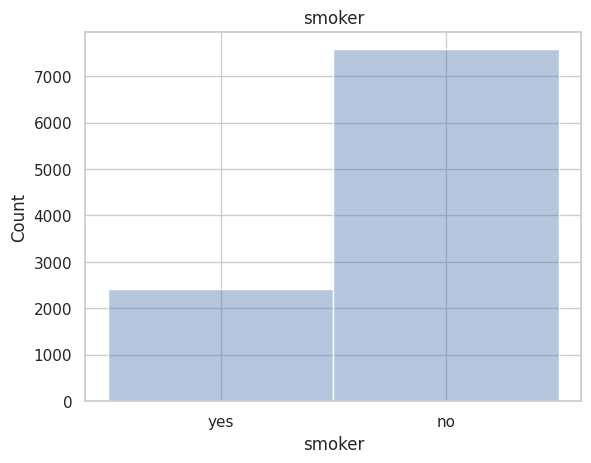

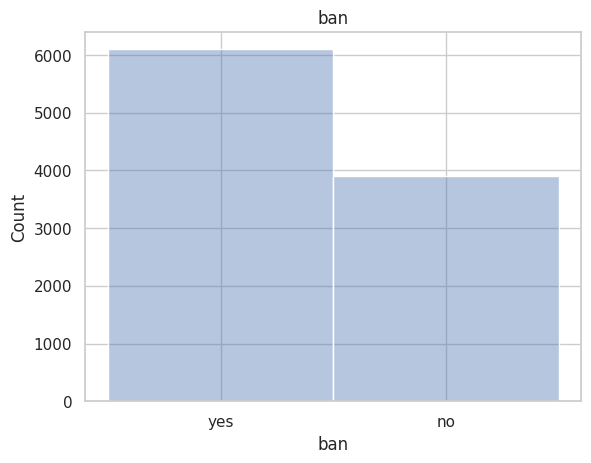

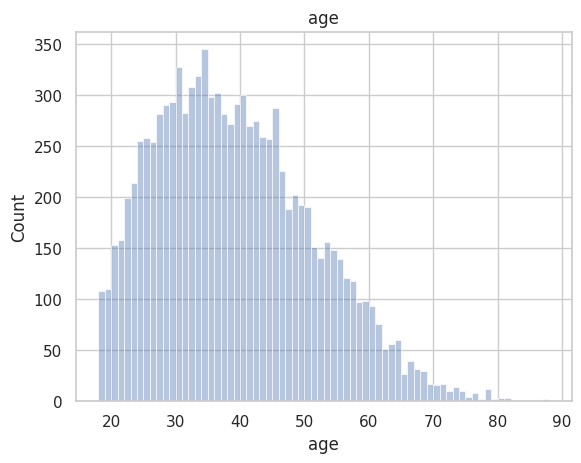

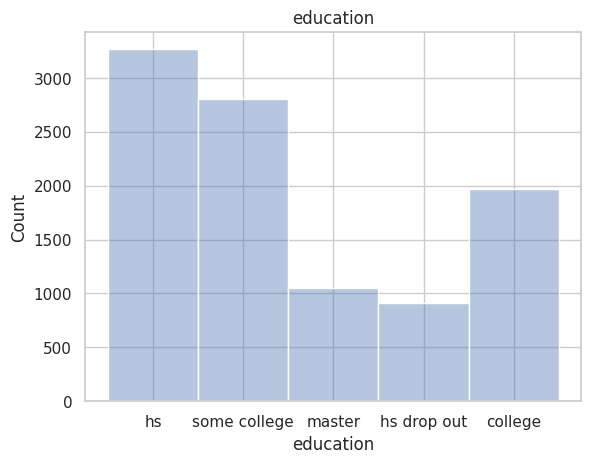

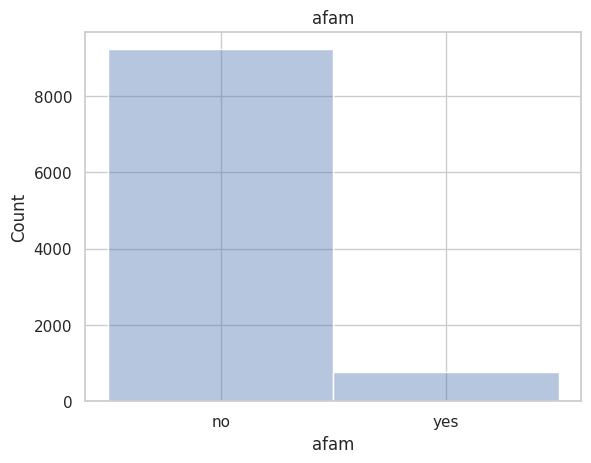

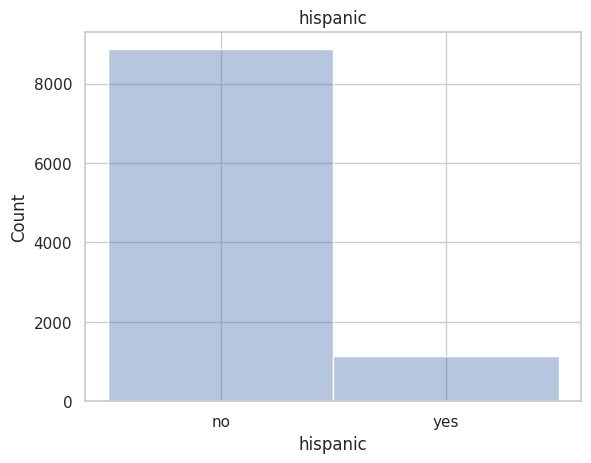

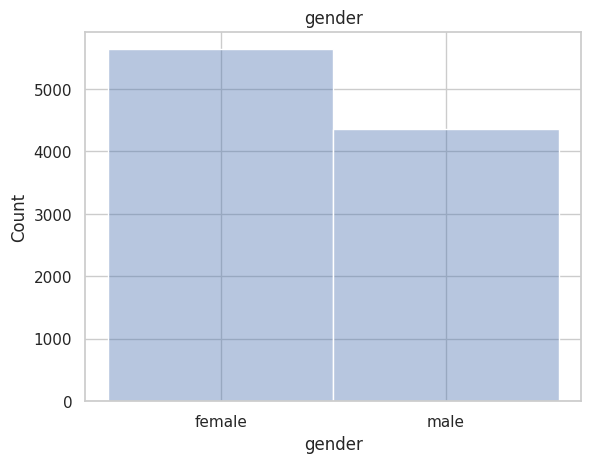

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un bucle para iterar sobre cada variable
for col in df1.columns:
    # Crear un histograma para la variable
    sns.histplot(df[col], bins=5, binwidth=1, alpha=0.4)
    # Agregar un título al gráfico
    plt.title(col)
    # Mostrar el gráfico
    plt.show()


<Axes: >

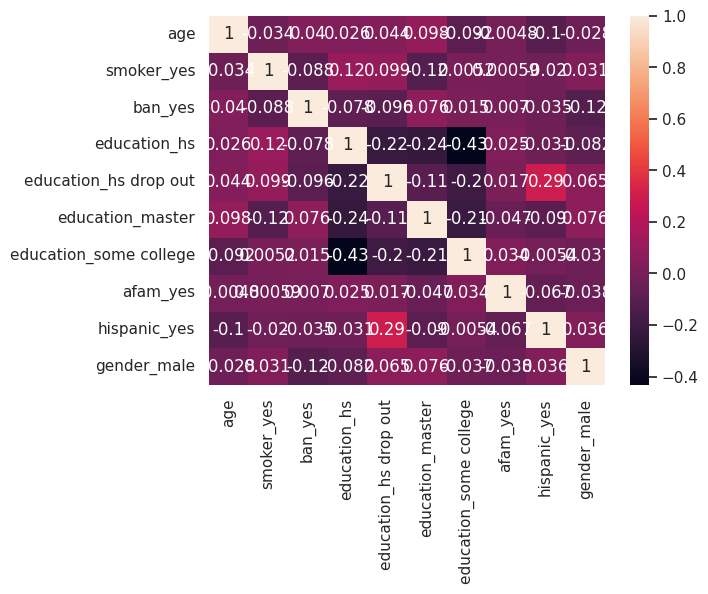

In [ ]:
# Convertimos las variables factor a OneHotEncoder
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1 = pd.concat([df1, pd.get_dummies(df1[col] , prefix=col, drop_first=True)], axis=1)
        del df1[col]

# Calculamos la matriz de correlación
corr = df1.corr()

# Pintamos el mapa de calor
sns.heatmap(corr, annot=True)

In [ ]:
print(corr)

                             age  smoker_yes   ban_yes  education_hs  \
age                     1.000000   -0.034173  0.040023      0.026071   
smoker_yes             -0.034173    1.000000 -0.088296      0.116774   
ban_yes                 0.040023   -0.088296  1.000000     -0.077639   
education_hs            0.026071    0.116774 -0.077639      1.000000   
education_hs drop out   0.044011    0.098920 -0.096229     -0.220615   
education_master        0.098149   -0.119575  0.076253     -0.238282   
education_some college -0.092359    0.005236  0.015219     -0.434510   
afam_yes               -0.004805    0.000588  0.006974      0.025486   
hispanic_yes           -0.104510   -0.020439 -0.034598     -0.031180   
gender_male            -0.027790    0.031458 -0.115149     -0.082105   

                        education_hs drop out  education_master  \
age                                  0.044011          0.098149   
smoker_yes                           0.098920         -0.119575   
ban_ye

INICIO DEL ESTUDIO DE MACHINE LEARNING

In [ ]:
print(df1.columns)

Index(['age', 'smoker_yes', 'ban_yes', 'education_hs', 'education_hs drop out',
       'education_master', 'education_some college', 'afam_yes',
       'hispanic_yes', 'gender_male'],
      dtype='object')


In [ ]:
# Renombrar la columna
df1.rename(columns={'smoker_yes': 'smoker'}, inplace=True)

In [ ]:
# Variable dependiente (objetivo)
vardep='smoker'

# Variables continuas
var_cont = ['age']

# Variables categóricas
var_cat = ['ban_yes', 'education_hs', 'education_hs drop out',
       'education_master', 'education_some college', 'afam_yes',
       'hispanic_yes', 'gender_male']

In [ ]:
df1

,age,smoker,ban_yes,education_hs,education_hs drop out,education_master,education_some college,afam_yes,hispanic_yes,gender_male
0,41,1,1,1,0,0,0,0,0,0
1,44,1,1,0,0,0,1,0,0,0
2,19,0,0,0,0,0,1,0,0,0
3,29,1,0,1,0,0,0,0,0,0
4,28,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,55,0,0,1,0,0,0,0,0,1
9996,31,0,0,0,0,1,0,0,0,1
9997,36,0,1,0,0,0,1,0,0,0
9998,42,1,0,1,0,0,0,0,0,0


SELECCIÓN DE VARIABLES

In [ ]:
# Selección aleatoria de variables

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector


# Separar las variables predictoras (X) y la variable objetivo (y)
X = df1[['age', 'ban_yes', 'education_hs', 'education_hs drop out', 'education_master', 'education_some college', 'afam_yes', 'hispanic_yes', 'gender_male']]
y = df1[vardep]

# Aplicar diferentes métodos de selección de características
methods = {
    "SelectKBest (f_classif)": SelectKBest(score_func=f_classif, k=7),
    "SelectKBest (chi2)": SelectKBest(score_func=chi2, k=7),
    "SelectKBest (mutual_info_classif)": SelectKBest(score_func=mutual_info_classif, k=7),
    "Recursive Feature Elimination (RFE)": RFE(LogisticRegression(max_iter=1000), n_features_to_select=7)
}

selected_features = {}

for method_name, method in methods.items():
    method.fit(X, y)
    selected_mask = method.get_support()
    selected_features[method_name] = X.columns[selected_mask]

# Imprimir las 7 mejores variables seleccionadas para cada método
for method_name, features in selected_features.items():
    print(f"{method_name} - Top 7 selected features:")
    print(features.tolist())
    print()

SelectKBest (f_classif) - Top 7 selected features:
['age', 'ban_yes', 'education_hs', 'education_hs drop out', 'education_master', 'hispanic_yes', 'gender_male']

SelectKBest (chi2) - Top 7 selected features:
['age', 'ban_yes', 'education_hs', 'education_hs drop out', 'education_master', 'hispanic_yes', 'gender_male']

SelectKBest (mutual_info_classif) - Top 7 selected features:
['age', 'ban_yes', 'education_hs', 'education_hs drop out', 'education_master', 'hispanic_yes', 'gender_male']

Recursive Feature Elimination (RFE) - Top 7 selected features:
['ban_yes', 'education_hs', 'education_hs drop out', 'education_master', 'education_some college', 'hispanic_yes', 'gender_male']



In [ ]:
#MÉTODO STEPWISE AIC FORWARD

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import make_scorer
import warnings

# Desactivar los warnings
warnings.filterwarnings("ignore")


# Definir una función de puntuación personalizada para SequentialFeatureSelector
def custom_scorer(estimator, X, y):
    return aic_score(y, estimator.predict(X))


sfs = SequentialFeatureSelector(LogisticRegression(max_iter=1000),
                                n_features_to_select=7,
                                direction='forward',
                                scoring=make_scorer(custom_scorer),
                                cv=5)  # Ajusta el número de folds según tus necesidades

sfs.fit(X, y)
selected_features["Sequential Feature Selection AIC (Forward)"] = X.columns[sfs.get_support()]

# Imprimir las 7 mejores variables seleccionadas para cada método
for method_name, features in selected_features.items():
    print(f"{method_name} - Top 7 selected features:")
    print(features.tolist())
    print()

KeyboardInterrupt: ignored

In [ ]:
#MÉTODO STEPWISE AIC BACKWARD

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import warnings

# Desactivar los warnings
warnings.filterwarnings("ignore")

# Definir una función de puntuación personalizada para SequentialFeatureSelector
def custom_scorer(estimator, X, y):
    return aic_score(y, estimator.predict(X))

# Crear el SequentialFeatureSelector con dirección backward
sbs = SequentialFeatureSelector(LogisticRegression(max_iter=1000),
                                n_features_to_select=7,
                                direction='backward',
                                scoring=make_scorer(custom_scorer),
                                cv=5)

# Ajustar el modelo al conjunto de datos
sbs.fit(X, y)

# Obtener las variables seleccionadas
selected_features["Sequential Feature Selection AIC (Backward)"] = X.columns[sbs.get_support()]

# Imprimir las 7 mejores variables seleccionadas para cada método
for method_name, features in selected_features.items():
    print(f"{method_name} - Top 7 selected features:")
    print(features.tolist())
    print()

In [ ]:
#MÉTODO STEPWISE BIC FORWARD

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import make_scorer
import warnings

# Desactivar los warnings
warnings.filterwarnings("ignore")


# Definir una función de puntuación personalizada para SequentialFeatureSelector
def custom_scorer(estimator, X, y):
    return bic_score(y, estimator.predict(X))


sfs = SequentialFeatureSelector(LogisticRegression(max_iter=1000),
                                n_features_to_select=7,
                                direction='forward',
                                scoring=make_scorer(custom_scorer),
                                cv=5)  # Ajusta el número de folds según tus necesidades

sfs.fit(X, y)
selected_features["Sequential Feature Selection BIC (Forward)"] = X.columns[sfs.get_support()]

# Imprimir las 7 mejores variables seleccionadas para cada método
for method_name, features in selected_features.items():
    print(f"{method_name} - Top 7 selected features:")
    print(features.tolist())
    print()

In [ ]:
#MÉTODO STEPWISE BIC BACKWARD

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import warnings

# Desactivar los warnings
warnings.filterwarnings("ignore")

# Definir una función de puntuación personalizada para SequentialFeatureSelector
def custom_scorer(estimator, X, y):
    return bic_score(y, estimator.predict(X))

# Crear el SequentialFeatureSelector con dirección backward
sbs = SequentialFeatureSelector(LogisticRegression(max_iter=1000),
                                n_features_to_select=7,
                                direction='backward',
                                scoring=make_scorer(custom_scorer),
                                cv=5)

# Ajustar el modelo al conjunto de datos
sbs.fit(X, y)

# Obtener las variables seleccionadas
selected_features["Sequential Feature Selection BIC (Backward)"] = X.columns[sbs.get_support()]

# Imprimir las 7 mejores variables seleccionadas para cada método
for method_name, features in selected_features.items():
    print(f"{method_name} - Top 7 selected features:")
    print(features.tolist())
    print()

In [ ]:
selected_features

In [ ]:
#Me quedo con tres de ellas para su estudio.
var_selected = []
var_selected.append(('ALL', ['age', 'ban_yes', 'education_hs', 'education_hs drop out', 'education_master', 'education_some college', 'afam_yes', 'hispanic_yes', 'gender_male']))
var_selected.append(('S_AIC_F', selected_features['Sequential Feature Selection AIC (Forward)']))
var_selected.append(('S_AIC_B', selected_features['Sequential Feature Selection AIC (Backward)']))
print(var_selected)

In [ ]:
#Me quedo con tres de ellas para su estudio.
var_selected = []
var_selected.append(('ALL', ['age', 'ban_yes', 'education_hs', 'education_hs drop out', 'education_master', 'education_some college', 'afam_yes', 'hispanic_yes', 'gender_male']))
var_selected.append(('S_AIC_F', ['age', 'ban_yes', 'education_hs', 'education_hs drop out','education_master', 'education_some college', 'afam_yes']))
var_selected.append(('S_AIC_B', ['education_hs', 'education_hs drop out', 'education_master', 'education_some college', 'afam_yes', 'hispanic_yes', 'gender_male']))
print(var_selected)

ESTANDARIZAR AGE - NO ES NECESARIO PARA TODOS LOS MÉTODOS. SÓLO COMODIDAD

In [ ]:
from sklearn.preprocessing import StandardScaler

#Estandarizar age
scaler = StandardScaler()
df1['age'] = scaler.fit_transform(df1[['age']])
df1.head()

DIVIDIR TRAIN TEST

In [ ]:
from sklearn.model_selection import train_test_split


#Dividir el conjunto en train test
X = df1.drop(vardep, axis=1)
y = df1[vardep]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

IMPORTO LIBRERÍAS

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

DEFINIR MODELOS CANDIDATOS PARA CADA ALGORITMO

In [ ]:
models = []

# Logistic Regression
lr_models = [
    ('LR1', LogisticRegression(random_state=seed, C=0.1, solver='liblinear')),
    ('LR2', LogisticRegression(random_state=seed, C=1.0, solver='lbfgs', max_iter=200)),
    ('LR3', LogisticRegression(random_state=seed, C=10.0, solver='liblinear', penalty='l1')),
    ('LR4', LogisticRegression(random_state=seed, C=0.01, solver='liblinear', penalty='l2')),
    ('LR5', LogisticRegression(random_state=seed, C=1.0, solver='liblinear', class_weight='balanced')),
    ('LR6', LogisticRegression(random_state=seed, C=0.1, solver='lbfgs', class_weight='balanced')),
    ('LR7', LogisticRegression(random_state=seed, C=10.0, solver='lbfgs', class_weight='balanced')),
    ('LR8', LogisticRegression(random_state=seed, C=0.01, solver='lbfgs', max_iter=500)),
    ('LR9', LogisticRegression(random_state=seed, C=1.0, solver='liblinear', dual=True)),
    ('LR10', LogisticRegression(random_state=seed, C=0.1, solver='lbfgs', dual=False)),
    ('LR11', LogisticRegression(random_state=seed, C=10.0, solver='liblinear', dual=True)),
    ('LR12', LogisticRegression(random_state=seed, C=1.0, solver='lbfgs', l1_ratio=0.5)),
    ('LR13', LogisticRegression(random_state=seed, C=0.1, solver='liblinear', l1_ratio=0.3)),
    ('LR14', LogisticRegression(random_state=seed, C=10.0, solver='lbfgs', l1_ratio=0.7)),
]

# Decision Tree Classifier
dtc_models = [
    ('DTC1', DecisionTreeClassifier(random_state=seed, max_depth=3, min_samples_split=2)),
    ('DTC2', DecisionTreeClassifier(random_state=seed, max_depth=5, min_samples_split=5, min_samples_leaf=2)),
    ('DTC3', DecisionTreeClassifier(random_state=seed, max_depth=7, min_samples_split=10, criterion='entropy')),
    ('DTC4', DecisionTreeClassifier(random_state=seed, max_depth=4, min_samples_split=3, criterion='gini')),
    ('DTC5', DecisionTreeClassifier(random_state=seed, max_depth=6, min_samples_split=8, min_samples_leaf=4)),
    ('DTC6', DecisionTreeClassifier(random_state=seed, max_depth=8, min_samples_split=15, criterion='gini')),
    ('DTC7', DecisionTreeClassifier(random_state=seed, max_depth=5, min_samples_split=5, min_samples_leaf=2, criterion='entropy')),
    ('DTC8', DecisionTreeClassifier(random_state=seed, max_depth=6, min_samples_split=8, criterion='gini')),
    ('DTC9', DecisionTreeClassifier(random_state=seed, max_depth=9, min_samples_split=20, min_samples_leaf=3, criterion='entropy')),
    ('DTC10', DecisionTreeClassifier(random_state=seed, max_depth=7, min_samples_split=10, criterion='gini')),
    ('DTC11', DecisionTreeClassifier(random_state=seed, max_depth=4, min_samples_split=3, min_samples_leaf=1)),
    ('DTC12', DecisionTreeClassifier(random_state=seed, max_depth=6, min_samples_split=8, criterion='entropy', min_weight_fraction_leaf=0.1)),
    ('DTC13', DecisionTreeClassifier(random_state=seed, max_depth=8, min_samples_split=15, min_samples_leaf=4)),
    ('DTC14', DecisionTreeClassifier(random_state=seed, max_depth=5, min_samples_split=5, min_samples_leaf=2, criterion='gini')),
]


# Bagging Classifier
bgg_models = [
    ('BGG1', BaggingClassifier(random_state=seed, n_estimators=50, max_samples=0.7, max_features=0.7)),
    ('BGG2', BaggingClassifier(random_state=seed, n_estimators=100, max_samples=0.8, max_features=0.8, bootstrap_features=True)),
    ('BGG3', BaggingClassifier(random_state=seed, n_estimators=150, max_samples=0.9, max_features=0.9, bootstrap=False)),
    ('BGG4', BaggingClassifier(random_state=seed, n_estimators=80, max_samples=0.6, max_features=0.6)),
    ('BGG5', BaggingClassifier(random_state=seed, n_estimators=120, max_samples=0.85, max_features=0.85, bootstrap_features=True)),
    ('BGG6', BaggingClassifier(random_state=seed, n_estimators=200, max_samples=0.95, max_features=0.95, bootstrap=False)),
    ('BGG7', BaggingClassifier(random_state=seed, n_estimators=100, max_samples=0.8, max_features=0.8)),
    ('BGG8', BaggingClassifier(random_state=seed, n_estimators=150, max_samples=0.9, max_features=0.9)),
    ('BGG9', BaggingClassifier(random_state=seed, n_estimators=200, max_samples=1.0, max_features=1.0, bootstrap=False)),
    ('BGG10', BaggingClassifier(random_state=seed, n_estimators=120, max_samples=0.85, max_features=0.85, bootstrap_features=True)),
    ('BGG11', BaggingClassifier(random_state=seed, n_estimators=150, max_samples=0.9, max_features=0.9)),
    ('BGG12', BaggingClassifier(random_state=seed, n_estimators=180, max_samples=0.95, max_features=0.95, bootstrap=False)),
    ('BGG13', BaggingClassifier(random_state=seed, n_estimators=80, max_samples=0.6, max_features=0.6)),
    ('BGG14', BaggingClassifier(random_state=seed, n_estimators=100, max_samples=0.8, max_features=0.8)),
]


# Random Forest Classifier
rf_models = [
    ('RF1', RandomForestClassifier(random_state=seed, n_estimators=50, max_depth=3, min_samples_split=2)),
    ('RF2', RandomForestClassifier(random_state=seed, n_estimators=100, max_depth=5, min_samples_split=5, min_weight_fraction_leaf=0.1)),
    ('RF3', RandomForestClassifier(random_state=seed, n_estimators=150, max_depth=7, min_samples_split=10, criterion='entropy')),
    ('RF4', RandomForestClassifier(random_state=seed, n_estimators=80, max_depth=4, min_samples_split=3, criterion='gini')),
    ('RF5', RandomForestClassifier(random_state=seed, n_estimators=120, max_depth=6, min_samples_split=8, min_samples_leaf=4)),
    ('RF6', RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=8, min_samples_split=15, criterion='gini')),
    ('RF7', RandomForestClassifier(random_state=seed, n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2, criterion='entropy')),
    ('RF8', RandomForestClassifier(random_state=seed, n_estimators=150, max_depth=6, min_samples_split=8, criterion='gini')),
    ('RF9', RandomForestClassifier(random_state=seed, n_estimators=180, max_depth=9, min_samples_split=20, min_samples_leaf=3, criterion='entropy')),
    ('RF10', RandomForestClassifier(random_state=seed, n_estimators=120, max_depth=7, min_samples_split=10, criterion='gini')),
    ('RF11', RandomForestClassifier(random_state=seed, n_estimators=80, max_depth=4, min_samples_split=3, min_samples_leaf=1)),
    ('RF12', RandomForestClassifier(random_state=seed, n_estimators=150, max_depth=6, min_samples_split=8, criterion='entropy', min_weight_fraction_leaf=0.1)),
    ('RF13', RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=8, min_samples_split=15, min_samples_leaf=4)),
    ('RF14', RandomForestClassifier(random_state=seed, n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2, criterion='gini')),
]

# Gradient Boosting Classifier
gboost_models = [
    ('GBOOST1', GradientBoostingClassifier(random_state=seed, n_estimators=50, learning_rate=0.1, max_depth=3)),
    ('GBOOST2', GradientBoostingClassifier(random_state=seed, n_estimators=100, learning_rate=0.05, max_depth=5, min_samples_split=5)),
    ('GBOOST3', GradientBoostingClassifier(random_state=seed, n_estimators=150, learning_rate=0.01, max_depth=7, min_samples_split=10)),
    ('GBOOST4', GradientBoostingClassifier(random_state=seed, n_estimators=80, learning_rate=0.1, max_depth=4)),
    ('GBOOST5', GradientBoostingClassifier(random_state=seed, n_estimators=120, learning_rate=0.05, max_depth=6, min_samples_split=8)),
    ('GBOOST6', GradientBoostingClassifier(random_state=seed, n_estimators=200, learning_rate=0.01, max_depth=8, min_samples_split=15)),
    ('GBOOST7', GradientBoostingClassifier(random_state=seed, n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=5)),
    ('GBOOST8', GradientBoostingClassifier(random_state=seed, n_estimators=150, learning_rate=0.05, max_depth=6, min_samples_split=8)),
    ('GBOOST9', GradientBoostingClassifier(random_state=seed, n_estimators=200, learning_rate=0.01, max_depth=9, min_samples_split=20)),
    ('GBOOST10', GradientBoostingClassifier(random_state=seed, n_estimators=120, learning_rate=0.05, max_depth=7, min_samples_split=10)),
    ('GBOOST11', GradientBoostingClassifier(random_state=seed, n_estimators=80, learning_rate=0.1, max_depth=4)),
    ('GBOOST12', GradientBoostingClassifier(random_state=seed, n_estimators=150, learning_rate=0.01, max_depth=6, min_samples_split=8)),
    ('GBOOST13', GradientBoostingClassifier(random_state=seed, n_estimators=200, learning_rate=0.05, max_depth=8, min_samples_split=15)),
    ('GBOOST14', GradientBoostingClassifier(random_state=seed, n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=5)),
]

# XGBoost Classifier
xgb_models = [
    ('XGB1', xgb.XGBClassifier(random_state=seed, n_estimators=50, learning_rate=0.1, max_depth=3)),
    ('XGB2', xgb.XGBClassifier(random_state=seed, n_estimators=100, learning_rate=0.05, max_depth=5, min_child_weight=3)),
    ('XGB3', xgb.XGBClassifier(random_state=seed, n_estimators=150, learning_rate=0.01, max_depth=7, min_child_weight=5)),
    ('XGB4', xgb.XGBClassifier(random_state=seed, n_estimators=80, learning_rate=0.1, max_depth=4)),
    ('XGB5', xgb.XGBClassifier(random_state=seed, n_estimators=120, learning_rate=0.05, max_depth=6, min_child_weight=2)),
    ('XGB6', xgb.XGBClassifier(random_state=seed, n_estimators=200, learning_rate=0.01, max_depth=8, min_child_weight=1)),
    ('XGB7', xgb.XGBClassifier(random_state=seed, n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=3)),
    ('XGB8', xgb.XGBClassifier(random_state=seed, n_estimators=150, learning_rate=0.05, max_depth=6, min_child_weight=2)),
    ('XGB9', xgb.XGBClassifier(random_state=seed, n_estimators=200, learning_rate=0.01, max_depth=9, min_child_weight=4)),
    ('XGB10', xgb.XGBClassifier(random_state=seed, n_estimators=120, learning_rate=0.05, max_depth=7, min_child_weight=5)),
    ('XGB11', xgb.XGBClassifier(random_state=seed, n_estimators=80, learning_rate=0.1, max_depth=4)),
    ('XGB12', xgb.XGBClassifier(random_state=seed, n_estimators=150, learning_rate=0.01, max_depth=6, min_child_weight=2)),
    ('XGB13', xgb.XGBClassifier(random_state=seed, n_estimators=200, learning_rate=0.05, max_depth=8, min_child_weight=1)),
    ('XGB14', xgb.XGBClassifier(random_state=seed, n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=3)),
]


models = lr_models + dtc_models + bgg_models + rf_models + gboost_models + xgb_models


In [ ]:
#Definir Bucle

def best_model(var_selected, models):
  results02=[]
  model_name=[]
  for var_name, var_list in var_selected:
    for name, alg in models:
      #Calculo las matrices de confusión para los conjuntos de train y test
      alg.fit(X_train[var_list], y_train)
      acc_train = alg.score(X_train[var_list], y_train)
      acc_test = alg.score(X_test[var_list], y_test)
      cm_train = confusion_matrix(y_train, alg.predict(X_train[var_list]))
      cm_test = confusion_matrix(y_test, alg.predict(X_test[var_list]))
      # Calculo la tasa de fallos para train y test
      error_rate_train = sum(cm_train.diagonal()) / len(y_train)
      error_rate_test = sum(cm_test.diagonal()) / len(y_test)
      model_name=(f"{name} {var_name}")
      results02.append([model_name, var_name, name, acc_train, acc_test, cm_train, cm_test])
  table_results02 = pd.DataFrame(results02)
  table_results02.columns = ['Modelo', 'Variables', 'Algoritmo', 'acc_train', 'acc_test', 'cm_train', 'cm_test']
  # Sort DataFrame based on 'acc_test' column in descending order
  table_results02 = table_results02.sort_values(by='acc_test', ascending=False)
  # If you want to reset the index after sorting
  table_results02 = table_results02.reset_index(drop=True)
  higher_acc_model = table_results02.iloc[0]
  print(higher_acc_model)
  return higher_acc_model, table_results02

In [ ]:
best_model_lr, table_lr = best_model(var_selected, lr_models)
table_lr.head(8)

In [ ]:
best_model_dtc, table_dtc = best_model(var_selected, dtc_models)
table_dtc.head(8)

In [ ]:
best_model_bgg, table_bgg = best_model(var_selected, bgg_models)
table_bgg.head(8)

In [ ]:
best_model_rf, table_rf = best_model(var_selected, rf_models)
table_rf.head(8)

In [ ]:
best_model_gboost, table_gboost = best_model(var_selected, gboost_models)
table_gboost.head(8)

In [ ]:
best_model_xgb, table_xgb = best_model(var_selected, xgb_models)
table_xgb.head(8)

In [ ]:
#ALL
best_model_all, table_all = best_model(var_selected, models)
table_all.head(20)

In [ ]:
#GUARDAR TABLA DE RESULTADOS EN DRIVE

#table_all.to_csv('/content/drive/MyDrive/BIG DATA/01_ML INMACULADA/Tarea ML con R (segunda entrega)/Data_para_ml_inma/table_all.csv', index=False)

CONCLUSIONES:
1. HE ENTRENADO A LOS MODELOS UNA SOLA VEZ Y HE COMPROBADO SU ACCURACY EN TEST
2. CON LOS MEJORES MODELOS HARÉ ZOOM Y LOS SOMETERÉ A CROSS VALIDATION REPETIDA PARA EVALUARLOS
3. LOS MODELOS CON MEJORES ACCURACIES COINCIDEN CON QUE TIENEN TODAS LAS VARIABLES DE ENTRADA. SON MEJORES QUE PARA LAS SELECCIONES DE VARIABLES.
4. AÚN ASÍ VOY A METER EL CONJUNTO DE VARIABLES 'ALL', 'S_AIC_F' Y 'S_AIC_B' PARA LA VALIDACIÓN CRUZADA

VOY A PROBAR CROSS VALIDATION CON LOS MEJORES MODELOS A LA VEZ
MODELOS FINALISTAS

In [ ]:
models = []
models.append(('LR1', LogisticRegression(random_state=seed, C=0.1, solver='liblinear')))
models.append(('LR2', LogisticRegression(random_state=seed, C=1.0, solver='lbfgs', max_iter=200)))
models.append(('DTC4', DecisionTreeClassifier(random_state=seed, max_depth=4, min_samples_split=3, criterion='gini')))
models.append(('DTC5', DecisionTreeClassifier(random_state=seed, max_depth=6, min_samples_split=8, min_samples_leaf=4)))
models.append(('BGG14', BaggingClassifier(random_state=seed, n_estimators=100, max_samples=0.8, max_features=0.8)))
models.append(('BGG1', BaggingClassifier(random_state=seed, n_estimators=50, max_samples=0.7, max_features=0.7)))
models.append(('RF13', RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=8, min_samples_split=15, min_samples_leaf=4)))
models.append(('RF6', RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=8, min_samples_split=15, criterion='gini')))
models.append(('GBOOST4', GradientBoostingClassifier(random_state=seed, n_estimators=80, learning_rate=0.1, max_depth=4)))
models.append(('GBOOST1', GradientBoostingClassifier(random_state=seed, n_estimators=50, learning_rate=0.1, max_depth=3)))
models.append(('XGB10', xgb.XGBClassifier(random_state=seed, n_estimators=120, learning_rate=0.05, max_depth=7, min_child_weight=5)))
models.append(('XGB2', xgb.XGBClassifier(random_state=seed, n_estimators=100, learning_rate=0.05, max_depth=5, min_child_weight=3)))
models.append(('XGB4', xgb.XGBClassifier(random_state=seed, n_estimators=80, learning_rate=0.1, max_depth=4)))


In [ ]:
#Definir Bucle

results2=[]
results3=[]
results4=[]
results5=[]
alg_names=[]
var_used=[]
model_name=[]



for var_name, var_list in var_selected:
    for name, alg in models:
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
      # Evaluar el modelo utilizando validación cruzada repetida accuracy train
      scores_train_acc = cross_val_score(alg, X_train[var_list], y_train, cv=cv, scoring='accuracy')
      scores_train_auc = cross_val_score(alg, X_train[var_list], y_train, cv=cv, scoring='roc_auc')
      # Calcular la precisión promedio train
      mean_accuracy_train = scores_train_acc.mean()
      std_acuracy_train = scores_train_acc.std()
      mean_auc_train = scores_train_auc.mean()
      # Evaluar el modelo utilizando validación cruzada repetida para el test
      scores_test_acc = cross_val_score(alg, X_test[var_list], y_test, cv=cv, scoring='accuracy')
      scores_test_auc = cross_val_score(alg, X_test[var_list], y_test, cv=cv, scoring='roc_auc')
      # Calcular la precisión promedio test
      mean_accuracy_test = scores_test_acc.mean()
      std_acuracy_test = scores_test_acc.std()
      mean_auc_test = scores_test_auc.mean()
      #Calculo las matrices de confusión para los conjuntos de train y test
      alg.fit(X_train[var_list], y_train)
      acc_train = alg.score(X_train[var_list], y_train)
      acc_test = alg.score(X_test[var_list], y_test)
      cm_train = confusion_matrix(y_train, alg.predict(X_train[var_list]))
      cm_test = confusion_matrix(y_test, alg.predict(X_test[var_list]))

      # Calcular el coeficiente kappa
      scores_kappa_train = cohen_kappa_score(y_train, alg.predict(X_train[var_list]))
      scores_kappa_test = cohen_kappa_score(y_test, alg.predict(X_test[var_list]))
      mean_kappa_train = scores_kappa_train.mean()
      mean_kappa_test = scores_kappa_test.mean()

      model_name.append(f"{name} {var_name}")
      results2.append([var_name, name, mean_accuracy_train, std_acuracy_train, mean_auc_train, mean_accuracy_test, std_acuracy_test, mean_auc_test, acc_train, acc_test, cm_train, cm_test, mean_kappa_train, mean_kappa_test])
      results3.append(scores_test_acc)
      results4.append(scores_test_auc)
      results5.append(scores_kappa_test)
      alg_names.append( name)
      var_used.append(var_name)



In [ ]:
import pandas as pd

table_results2 = pd.DataFrame(results2).head(25)

table_results2.columns = ['Variables', 'Algoritmo', 'mean_accuracy_train', 'std_acuracy_train', 'mean_auc_train', 'mean_accuracy_test', 'std_acuracy_test', 'mean_auc_test', 'acc_train', 'acc_test', 'cm_train', 'cm_test', 'mean_kappa_train', 'mean_kappa_test']
table_results2 = table_results2.sort_values(by='mean_accuracy_test', ascending=False)
# If you want to reset the index after sorting
table_results2 = table_results2.reset_index(drop=True)

#table_results2.to_csv('/content/drive/MyDrive/BIG DATA/01_ML INMACULADA/Tarea ML con R (segunda entrega)/Data_para_ml_inma/table_results2_tabla_resumen.csv', index=False)

table_results2

DEFINIMOS FUNCIÓN DE GRÁFICO

In [ ]:
def boxplots_algorithms(results, names):
    plt.figure(figsize=(16,4))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names, rotation=90)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('ACCURACY TEST REPEATED CROSS')
boxplots_algorithms(results3, model_name)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('AUC TEST')
boxplots_algorithms(results4, model_name)

In [ ]:
#Me quedo con los siguientes modelos finalistas:

('LR2', LogisticRegression(random_state=seed, C=1.0, solver='lbfgs', max_iter=200)), ALL
('RF13', RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=8, min_samples_split=15, min_samples_leaf=4)), ALL
('RF6', RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=8, min_samples_split=15, criterion='gini')), ALL
('GBOOST1', GradientBoostingClassifier(random_state=seed, n_estimators=50, learning_rate=0.1, max_depth=3)) ALL

In [ ]:
#Calcular coste computacional:
import time


# Logistic Regression
start_time = time.time()
lr_model = LogisticRegression(random_state=seed, C=1.0, solver='lbfgs', max_iter=200)
lr_model.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time

# Random Forest ('RF13')
start_time = time.time()
rf13_model = RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=8, min_samples_split=15, min_samples_leaf=4)
rf13_model.fit(X_train, y_train)
end_time = time.time()
rf13_time = end_time - start_time

# Random Forest ('RF6')
start_time = time.time()
rf6_model = RandomForestClassifier(random_state=seed, n_estimators=200, max_depth=8, min_samples_split=15, criterion='gini')
rf6_model.fit(X_train, y_train)
end_time = time.time()
rf6_time = end_time - start_time

# Gradient Boosting ('GBOOST1')
start_time = time.time()
gboost1_model = GradientBoostingClassifier(random_state=seed, n_estimators=50, learning_rate=0.1, max_depth=3)
gboost1_model.fit(X_train, y_train)
end_time = time.time()
gboost1_time = end_time - start_time

print(f'Tiempo de entrenamiento Logistic Regression: {lr_time} segundos')
print(f'Tiempo de entrenamiento Random Forest (RF13): {rf13_time} segundos')
print(f'Tiempo de entrenamiento Random Forest (RF6): {rf6_time} segundos')
print(f'Tiempo de entrenamiento Gradient Boosting (GBOOST1): {gboost1_time} segundos')

Tiempo de entrenamiento Logistic Regression: 0.04511117935180664 segundos
Tiempo de entrenamiento Random Forest (RF13): 0.9829390048980713 segundos
Tiempo de entrenamiento Random Forest (RF6): 0.6930556297302246 segundos
Tiempo de entrenamiento Gradient Boosting (GBOOST1): 0.1980271339416504 segundos
